# Análisis de set de datos asociados a las remuneraciones pagadas por la ciudad de Chicago, EEUU. por contratación directa

### Fuente portal de datos de Chicago 

https://data.cityofchicago.org/

Fuente URL

https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w

### Carga de dataset y librerías

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
sns.color_palette("Set2")
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

In [3]:
pwd = os.getcwd()
dataset = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")

In [4]:
#exploración basica de dataset
dataset.head(7)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
5,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,51.0
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,118830.0,NaN


In [5]:
dataset.tail(7)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
31094,"ZYDEK, BRYAN",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,107028.0,NaN
31095,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31096,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
31097,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
31099,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN
31100,"ZYSKOWSKI, DARIUSZ",CHIEF DATA BASE ANALYST,DAIS,F,Salary,NaN,142176.0,NaN


#### Cantidad total de trabajadores activos

In [6]:
len(dataset)

31101

## Comparativa de cantidad de empleados por tipo de trabajo, departamento y tipo de contratación respectivamente

In [7]:
jobs_count = dataset.value_counts("Job Titles")
jobs_count

Job Titles
POLICE OFFICER                            8876
FIREFIGHTER-EMT                           1362
SERGEANT                                  1178
POLICE OFFICER (ASSIGNED AS DETECTIVE)    1064
MOTOR TRUCK DRIVER                         921
                                          ... 
DIR OF WATER PURIFICATION LABORATORIES       1
DIR OF WATER QUALITY SURVEILLANCE            1
PROGRAMMER/ANALYST - EXCLD                   1
DIR OF WORKERS COMPENSATION                  1
FOREMAN OF SIGN SHOP                         1
Length: 1078, dtype: int64

Text(0.5, 1.0, 'Cantidad de trabajadores por Tipo de trabajo - Top 20')

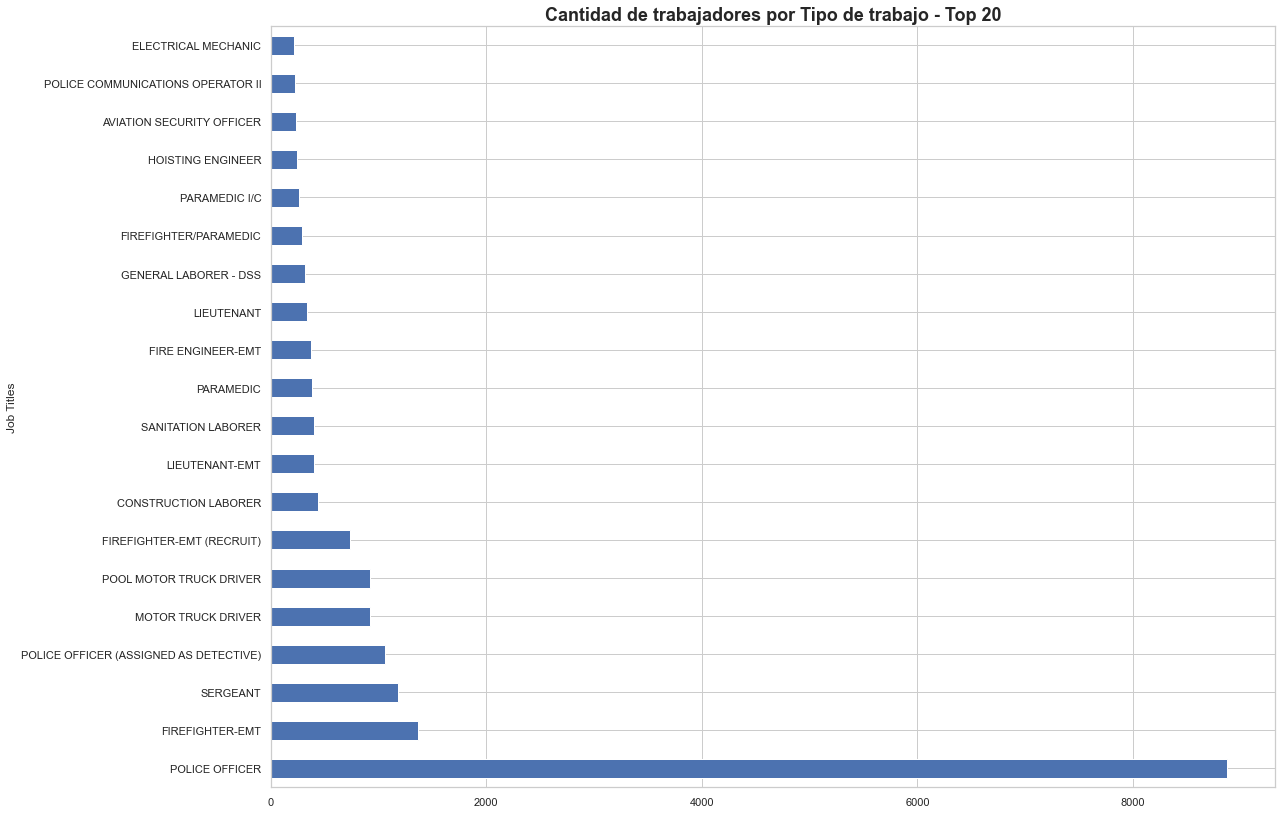

In [8]:
jobs_count.head(20).plot(kind="barh", figsize= (18,14))
plt.title("Cantidad de trabajadores por Tipo de trabajo - Top 20",
    fontdict = {'fontsize':18, 'fontweight':'bold'})

In [9]:
departamento = dataset.value_counts("Department")
departamento

Department
POLICE                 12537
FIRE                    4801
STREETS & SAN           2004
AVIATION                1887
WATER MGMNT             1826
TRANSPORTN              1091
PUBLIC LIBRARY          1018
DAIS                     967
OEMC                     864
HEALTH                   554
FAMILY & SUPPORT         552
FINANCE                  478
CITY COUNCIL             359
LAW                      331
PUBLIC SAFETY ADMIN      294
BUILDINGS                232
BUSINESS AFFAIRS         167
HOUSING & ECON DEV       152
COPA                     122
BOARD OF ELECTION        109
MAYOR'S OFFICE            99
INSPECTOR GEN             93
CITY CLERK                81
PROCUREMENT               78
HOUSING                   73
HUMAN RESOURCES           69
ANIMAL CONTRL             62
CULTURAL AFFAIRS          59
ADMIN HEARNG              35
BUDGET & MGMT             33
TREASURER                 27
DISABILITIES              21
HUMAN RELATIONS           15
BOARD OF ETHICS            8
POL

Text(0.5, 1.0, 'Cantidad de trabajadores por departamento - Top 20')

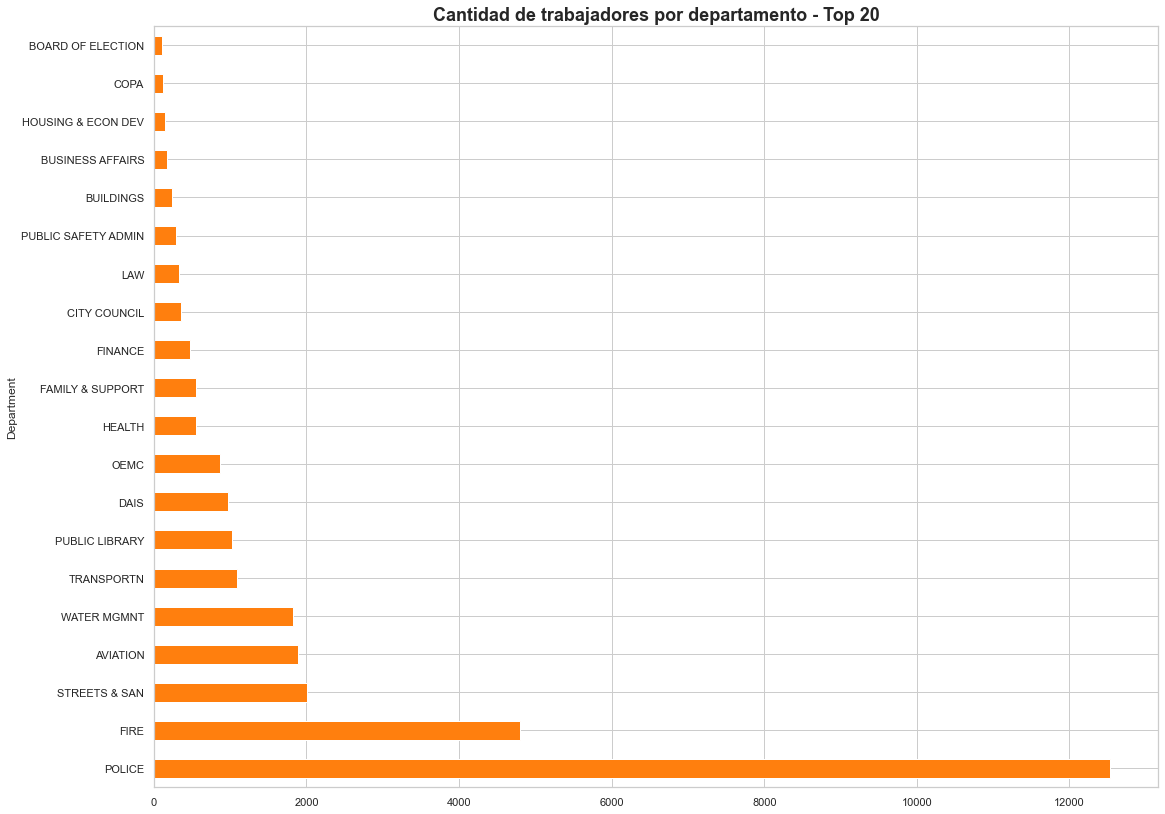

In [10]:
sns.set_color_codes("pastel")
departamento.head(20).plot(kind="barh", figsize= (18,14), color="tab:orange")
plt.title("Cantidad de trabajadores por departamento - Top 20",
    fontdict = {'fontsize':18, 'fontweight':'bold'})

### Comparativa de población por Tipo de jornada y por tipo de pago (mensual/por hora) 

In [11]:
dataset.value_counts("Full or Part-Time")

Full or Part-Time
F    30018
P     1083
dtype: int64

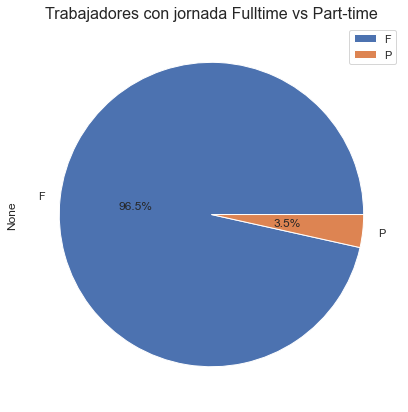

In [12]:
sns.set_color_codes("pastel")
dataset.value_counts("Full or Part-Time").plot(kind="pie", figsize=(7,7), autopct="%1.1f%%", pctdistance=0.5)
plt.title("Trabajadores con jornada Fulltime vs Part-time",
    fontdict = {'fontsize':16})
plt.legend()

In [13]:
dataset.value_counts("Salary or Hourly")

Salary or Hourly
Salary    24287
Hourly     6814
dtype: int64

Text(0.5, 1.0, 'Trabajadores con pago de salario mensual vs pago por hora')

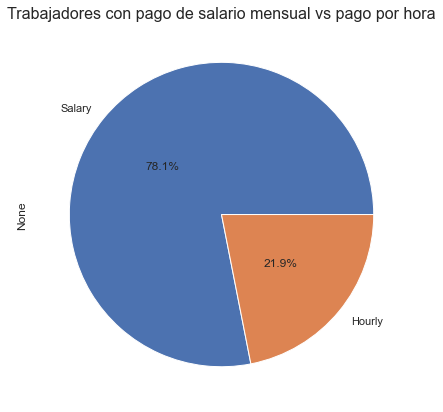

In [14]:
sns.set_color_codes("pastel")
dataset.value_counts("Salary or Hourly").plot(kind="pie", figsize=(7,7), autopct="%1.1f%%", pctdistance=0.5)
plt.title("Trabajadores con pago de salario mensual vs pago por hora",
    fontdict = {'fontsize':16})

### Cálculo de Salarios de trabajadores pagados por hora, se mensualizan y anualizan los datos

##### Se realiza el calculo del salario cada trabajadores pagados por hora en la columna Salary, para poder luego regularizar las remuneraciones mensualizadas y anualizadas.

In [15]:
dataset['Salary'] = round(dataset['Typical Hours'] * 52 / 12 * dataset["Hourly Rate"],1)
dataset['Salary'].head(10)

0       NaN
1       NaN
2       NaN
3    7956.0
4       NaN
5    8840.0
6       NaN
7       NaN
8     260.0
9       NaN
Name: Salary, dtype: float64

In [16]:
Jobs_hourly = dataset.loc[dataset['Salary or Hourly'] == 'Hourly']
Jobs_hourly['Annual Salary'] = dataset['Salary'] * 12
Jobs_hourly.head(5)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,Salary
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,95472.0,45.90,7956.0
5,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,106080.0,51.00,8840.0
8,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,3120.0,3.00,260.0
20,"ABDUL-SHAKUR, TAHIR J",POOL MOTOR TRUCK DRIVER,STREETS & SAN,P,Hourly,10.0,20409.6,39.25,1700.8
36,"ABRAMS, SAMUEL A",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,81639.6,39.25,6803.3


### Media de salarios de trabajadores con pago por hora, desviación estandar, quartiles, mínimos y máximos

In [17]:
Jobs_hourly.describe()

,Typical Hours,Annual Salary,Hourly Rate,Salary
count,6814.000000,6814.000000,6814.000000,6814.000000
mean,36.476372,77012.801174,38.851099,6417.733431
std,8.221823,32058.503912,12.978368,2671.541993
min,10.000000,3120.000000,3.000000,260.000000
25%,40.000000,57262.800000,34.547500,4771.900000
50%,40.000000,81639.600000,39.250000,6803.300000
75%,40.000000,102543.600000,49.300000,8545.300000
max,40.000000,244608.000000,134.400000,20384.000000


### Media de salarios de trabajadores con pago mensual, desviación estandar, quartiles, mínimos y máximos

#### Se genera una nueva tabla para los trabajadores con pago mensual de salarios

In [18]:
Jobs_salary = dataset.loc[dataset['Salary or Hourly'] == 'Salary']
Jobs_salary['Salary'] = dataset['Annual Salary'] / 12
Jobs_salary = Jobs_salary[['Name','Job Titles','Department',
    'Full or Part-Time','Salary or Hourly','Annual Salary','Salary']]
Jobs_salary.head(5)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Annual Salary,Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,122568.0,10214.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,110796.0,9233.0
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,122112.0,10176.0
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,86730.0,7227.5
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,118830.0,9902.5


In [19]:
Jobs_salary.describe()

,Annual Salary,Salary
count,24287.000000,24287.000000
mean,98750.838941,8229.236578
std,22459.971347,1871.664279
min,21600.000000,1800.000000
25%,86730.000000,7227.500000
50%,98940.000000,8245.000000
75%,109236.000000,9103.000000
max,275004.000000,22917.000000


In [20]:
#diferencia % entre la media anual de salarios mensuales y por hora
dif_medias_salario_anual = 98750.838941 / 77012.801174 *100 - 100
print("diferencia % entre la media anual de salarios mensuales y por hora % " + str(dif_medias_salario_anual))

diferencia % entre la media anual de salarios mensuales y por hora % 28.226525247258365


Con respecto al análisis de las poblaciones, se puede decir que la media de salarios mensualizados es un % 28.22 mayor que la media de salarios pagados por hora.

En relación a la desviación estándar, la medida indica para este tipo de distribuciones discretas, que la mayoria de los trabajadores se encontrarían entre, la media de salarios pagados menos la desviación estandar, y entre la media de salarios pagados más la desviación estandar. 

Por ejemplo, para el caso de los trabajadores con salario pagado por hora la desviación estándar de 32058,50, indica que la mayoria de los trabajadores se encuentran entre los salarios anuales de USD 44954,3 (calculado como media de salarios pagados 77012,80 MENOS la desviación estandar 32058.50 ) y USD 109071,3 (calculado como la media de salarios pagados 77012,80 MÁS la desviación estandar 32058.50 ).

En ése sentido, tomando como medida comparativa los valores de los salarios anuales, podemos decir que la variación en los salarios pagados por hora (std 32058.50) es mayor a la desviación de los valores de la distribución de salarios de trabajadores mensualizados (std 22459.971347), interpretando que la dispersión de los valores de remuneración con respecto a la media es mayor para los salarios pagados por hora.

Dicha diferencia en la desviación estándar está influenciada por valores extremos en la distribución de salarios pagados por hora y también se explica porque la misma tiene menor cantidad de trabajadores con pago por hora (6814) con respecto a los mensualizados (24287).
Lo mismo va a verse más claramente en la comparativa de ambas distribuciones.

### Comparativa de distribuciones de trabajadores con remuneración mensual y de los que son pagados por hora, en función a los ingresos que reciben

Text(0, 0.5, 'Cantidad de empleados')

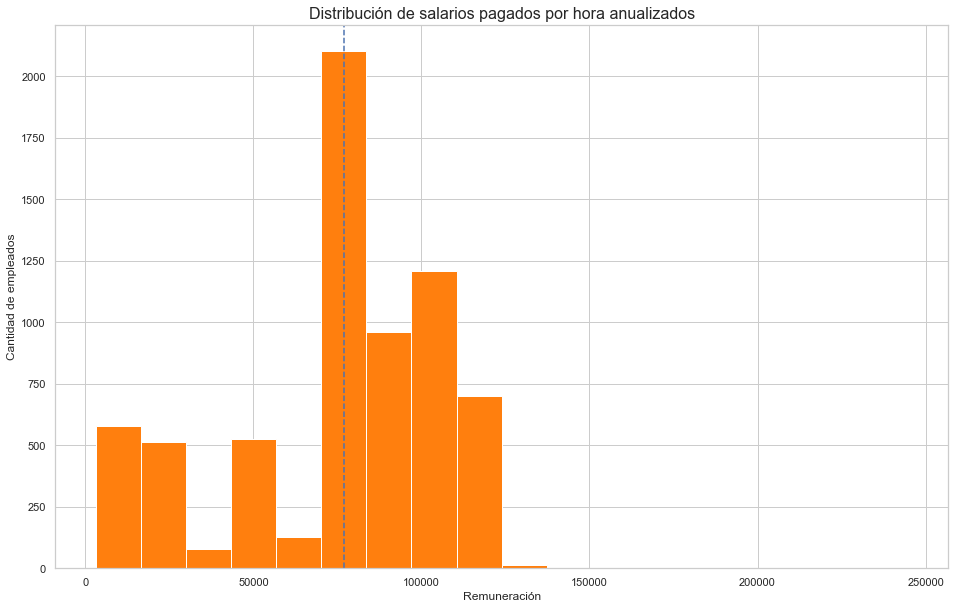

In [21]:
Jobs_hourly['Annual Salary'].plot(kind='hist', bins=18, figsize=(16,10), color="tab:orange")
plt.axvline(Jobs_hourly["Annual Salary"].mean(),linestyle = 'dashed')
plt.title("Distribución de salarios pagados por hora anualizados",
    fontdict = {'fontsize':16})
plt.xlabel("Remuneración")
plt.ylabel("Cantidad de empleados")

Text(0.5, 1.0, 'Distribución de salarios mensuales anualizados')

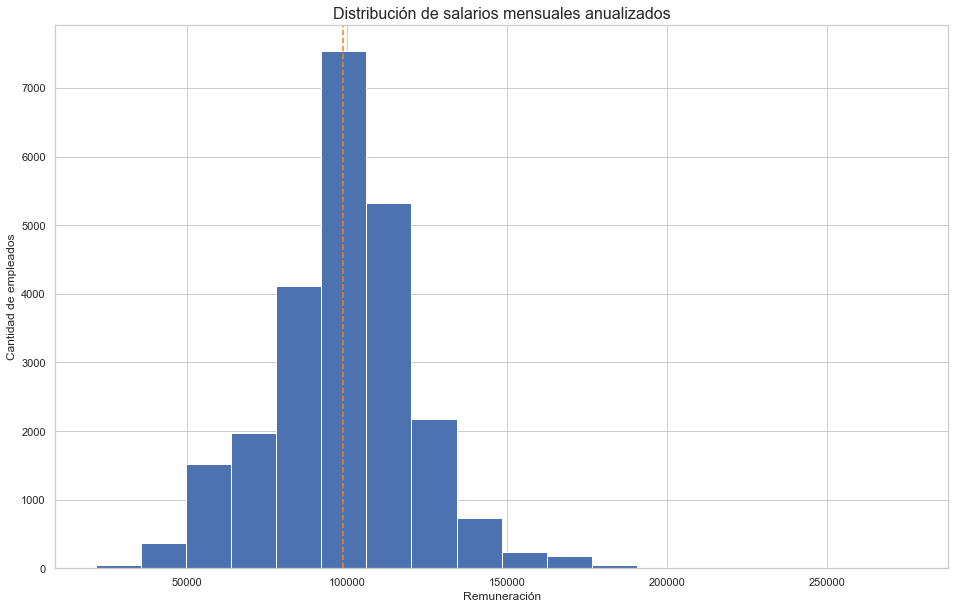

In [22]:
Jobs_salary['Annual Salary'].plot(kind='hist', bins=18, figsize=(16,10))
plt.axvline(Jobs_salary["Annual Salary"].mean(),linestyle = 'dashed', color="tab:orange")
plt.xlabel("Remuneración")
plt.ylabel("Cantidad de empleados")
plt.title("Distribución de salarios mensuales anualizados",
    fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Distribución en histograma de salarios anualizados comparativo de todos los trabajadores')

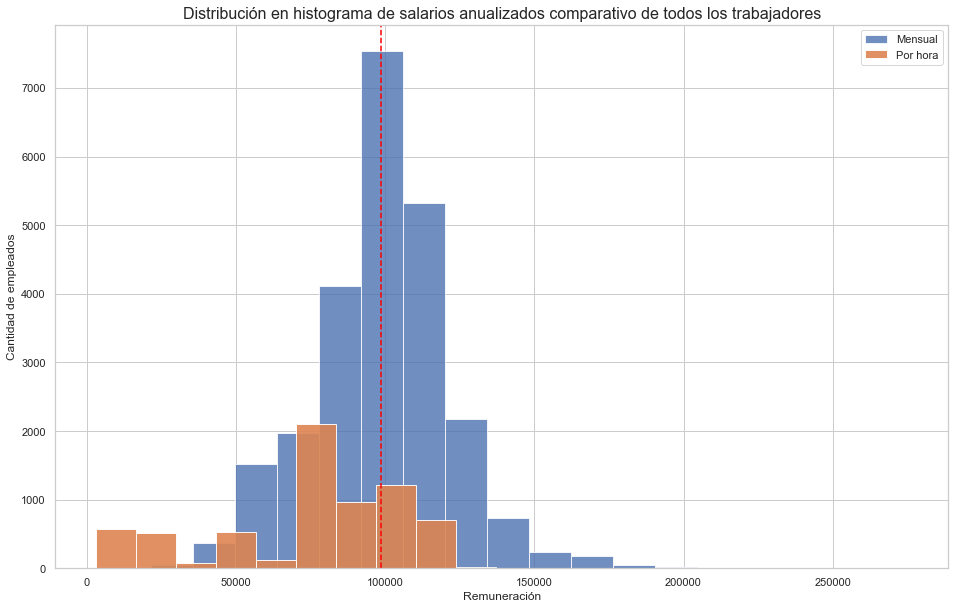

In [23]:
Jobs_salary['Annual Salary'].plot(kind='hist', bins=18, alpha=0.8, figsize=(16,10), label="Mensual")
Jobs_hourly['Annual Salary'].plot(kind='hist', bins=18, alpha=0.9, figsize=(16,10), label="Por hora")
plt.axvline(dataset["Annual Salary"].mean(),linestyle = 'dashed', color="red")
plt.legend()
plt.ylabel("Cantidad de empleados")
plt.xlabel("Remuneración")
plt.title("Distribución en histograma de salarios anualizados comparativo de todos los trabajadores",
    fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Distribución en terminos de densidad de salarios anualizados comparativo de todos los trabajadores')

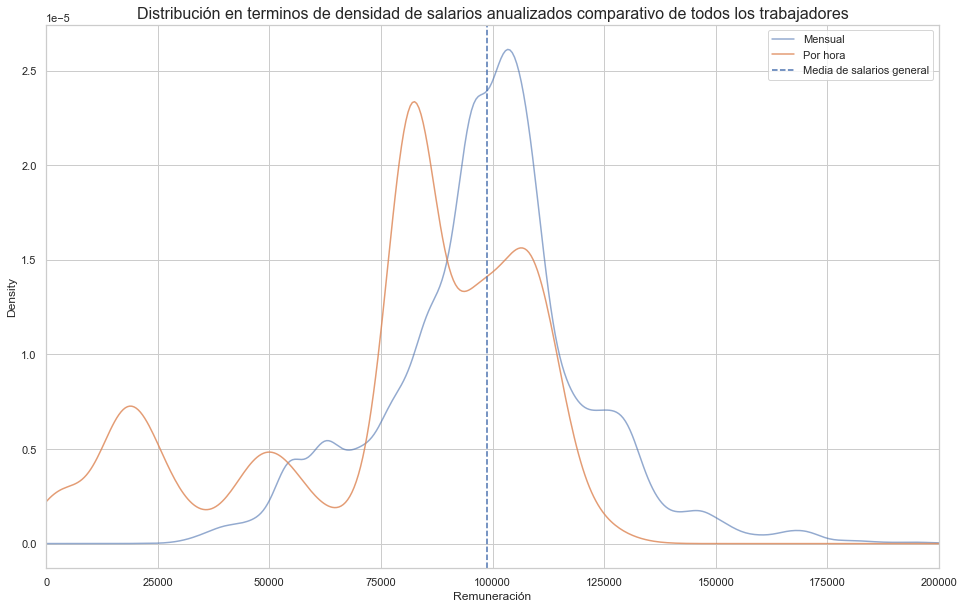

In [24]:
Jobs_salary['Annual Salary'].plot(kind='kde', alpha=0.6, figsize=(16,10), label="Mensual")
Jobs_hourly['Annual Salary'].plot(kind='kde', alpha=0.8, figsize=(16,10), label="Por hora")
plt.xlim([0, 200000])
plt.axvline(dataset["Annual Salary"].mean(),linestyle = 'dashed', label="Media de salarios general")
plt.legend()
plt.xlabel("Remuneración")
plt.title("Distribución en terminos de densidad de salarios anualizados comparativo de todos los trabajadores",
    fontdict = {'fontsize':16})

## Combinación de Tablas
#### Se combinan en una nueva variable, las 2 tablas previamente creadas para trabajadores mensualizados y de pago por hora, quedando todos los trabajadores incluidos con salario mensual y anual, se descartan en la nueva tabla las columnas de horas realizadas y valor de pago de cada hora.

In [25]:
Jobs_dataset = pd.concat([Jobs_salary, Jobs_hourly])
Jobs_dataset = Jobs_dataset.iloc[:,[0,1,2,4,5,6]]
Jobs_dataset.head()

,Name,Job Titles,Department,Salary or Hourly,Annual Salary,Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,Salary,122568.0,10214.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,Salary,110796.0,9233.0
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,Salary,122112.0,10176.0
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,Salary,86730.0,7227.5
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,Salary,118830.0,9902.5


## Trabajos mejor pagados

### Media de salarios (mensuales) por departamento

In [26]:
media_salarios = Jobs_dataset[["Department","Salary"]].groupby("Department").mean()
media_salarios.sort_values("Salary",ascending=True, inplace=True)
media_salarios.tail(10)

,Salary
Department,
TREASURER,8211.805556
LAW,8251.865861
POLICE,8448.983675
HUMAN RELATIONS,8544.066667
LICENSE APPL COMM,8561.000000
MAYOR'S OFFICE,8574.760606
BUDGET & MGMT,8611.909091
FIRE,8835.768515
BOARD OF ETHICS,8909.750000


### Mejores salarios medios por Tipo de Departamento

Text(0.5, 1.0, 'Mejores salarios medios por departamento - Top 15')

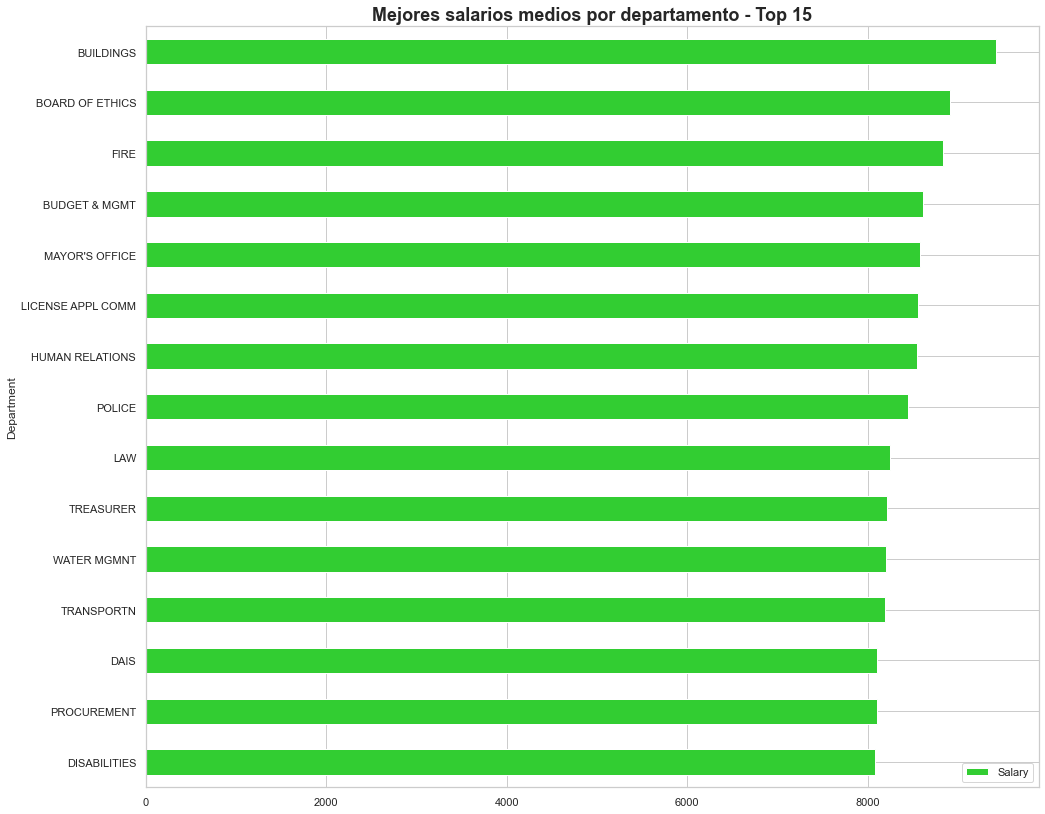

In [27]:
media_salarios.tail(15).plot(kind="barh", figsize= (16,14), color="limegreen")
plt.title("Mejores salarios medios por departamento - Top 15",
    fontdict = {'fontsize':18, 'fontweight':'bold'})

### Media de salarios (mensuales) por tipo de trabajo

In [28]:
media_salarios_por_trab = Jobs_dataset[["Job Titles","Salary"]].groupby("Job Titles").mean()
media_salarios_por_trab.sort_values("Salary",ascending=True, inplace=True)
media_salarios_por_trab.tail(20)

,Salary
Job Titles,
SUPERINTENDENT'S CHIEF OF STAFF,15771.0
COMMISSIONER OF PLANNING & DEVELOPMENT,15774.0
COMMISSIONER OF FAMILY AND SUPPORT SERVICES,15774.0
CORPORATION COUNSEL,15834.0
COMMISSIONER OF HEALTH,15953.0
ASST DEPUTY FIRE COMMISSIONER,16218.0
CHIEF,16219.0
DEPUTY FIRE COMMISSIONER,16422.0
DEPUTY SUPERINTENDENT,16800.0


### Mejores salarios medios por Tipo de trabajo

Text(0.5, 1.0, 'Mejores salarios medios por Tipo de trabajo - Top 15')

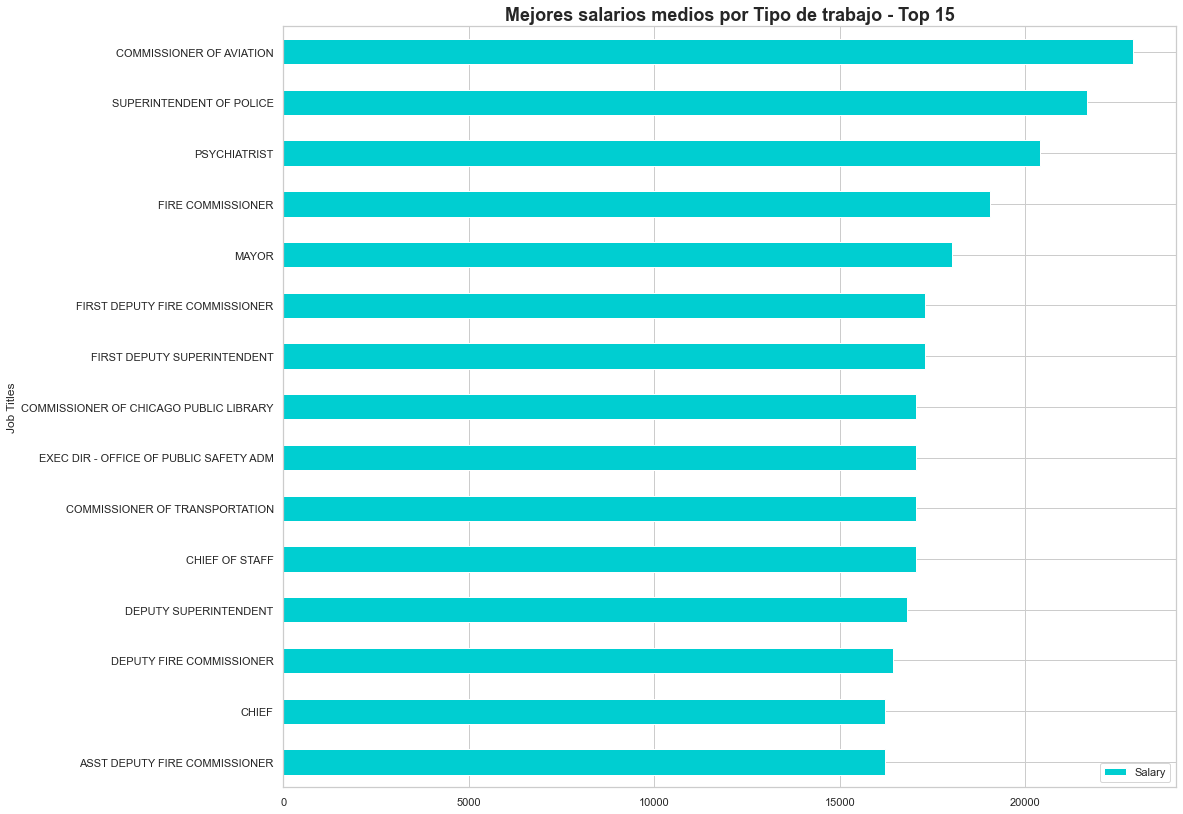

In [29]:
media_salarios_por_trab.tail(15).plot(kind="barh", figsize= (16,14), color="darkturquoise")
plt.title("Mejores salarios medios por Tipo de trabajo - Top 15",
    fontdict = {'fontsize':18, 'fontweight':'bold'})

## Costo de Salarios mensual por departamento (en millones de USD)

In [30]:
suma_salarios_mens_dep = Jobs_dataset[["Department","Salary"]].groupby("Department").sum()
suma_salarios_mens_dep.sort_values("Salary",ascending=False, inplace=True)
suma_salarios_mens_dep = suma_salarios_mens_dep["Salary"] / 1000000
suma_salarios_mens_dep

Department
POLICE                 105.924908
FIRE                    42.420525
WATER MGMNT             14.967882
AVIATION                12.688334
STREETS & SAN           12.328282
TRANSPORTN               8.932251
DAIS                     7.837571
PUBLIC LIBRARY           5.116329
OEMC                     4.904593
HEALTH                   4.298665
FINANCE                  3.221945
LAW                      2.731368
PUBLIC SAFETY ADMIN      2.329408
BUILDINGS                2.185849
FAMILY & SUPPORT         2.150783
CITY COUNCIL             1.940713
HOUSING & ECON DEV       1.207192
BUSINESS AFFAIRS         1.199816
COPA                     0.914720
MAYOR'S OFFICE           0.848901
INSPECTOR GEN            0.703268
PROCUREMENT              0.632120
HOUSING                  0.563261
HUMAN RESOURCES          0.544025
CITY CLERK               0.526477
BOARD OF ELECTION        0.507733
CULTURAL AFFAIRS         0.449993
ANIMAL CONTRL            0.377817
BUDGET & MGMT            0.284193
ADM

Text(0.5, 1.0, 'Top 15 departamentos con mayor gasto mensual en sueldos')

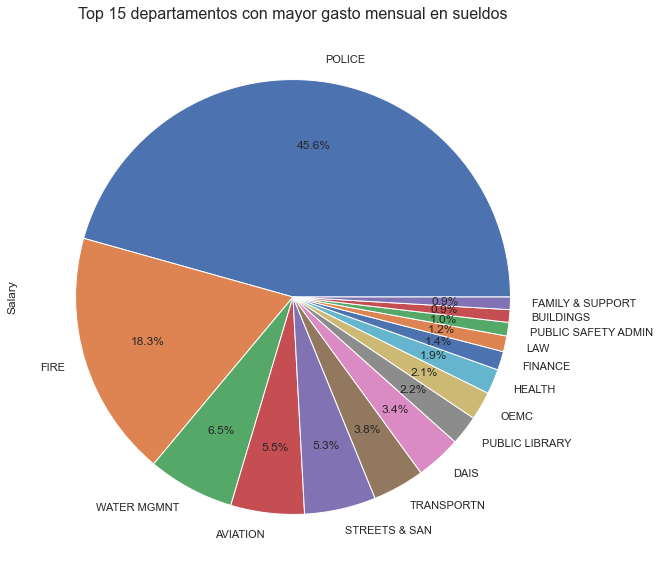

In [31]:
sns.set_color_codes("pastel")
suma_salarios_mens_dep.head(15).plot(kind="pie", figsize=(14,10), autopct="%1.1f%%", pctdistance=0.7)
plt.title("Top 15 departamentos con mayor gasto mensual en sueldos",
    fontdict = {'fontsize':16})

## Comparativa entre los 2 departamentos que más participación tiene sobre el gasto total de salarios

### Análisis de las remuneraciones del departamento de policía

#### Agrupación por media de salarios según tipo de trabajo

In [32]:
police_mask = Jobs_dataset["Department"] == "POLICE"
police_media = Jobs_dataset[police_mask]
police_media = police_media[["Department", "Job Titles","Annual Salary"]].groupby("Job Titles").mean()
police_media.sort_values("Annual Salary",ascending=False, inplace=True)
police_media

,Annual Salary
Job Titles,
SUPERINTENDENT OF POLICE,260004.000000
FIRST DEPUTY SUPERINTENDENT,207612.000000
DEPUTY SUPERINTENDENT,201600.000000
CHIEF,194628.000000
SUPERINTENDENT'S CHIEF OF STAFF,189252.000000
...,...
PHOTOGRAPHIC SPECIALIST-PUBLIC SAFETY,59100.000000
DOMESTIC VIOLENCE ADVOCATE,55044.000000
CRIME VICTIM ADVOCATE,53892.000000


Cantidad de cargos diferentes dentro del departamento

In [33]:
len(police_media)

98

Total de trabajadores del departamento de policia

In [34]:
len(Jobs_dataset[police_mask])

12537

#### Cargos en el departamento de policia con mayor Remuneración anual

Text(0.5, 1.0, 'Salarios anuales del departamento de policia')

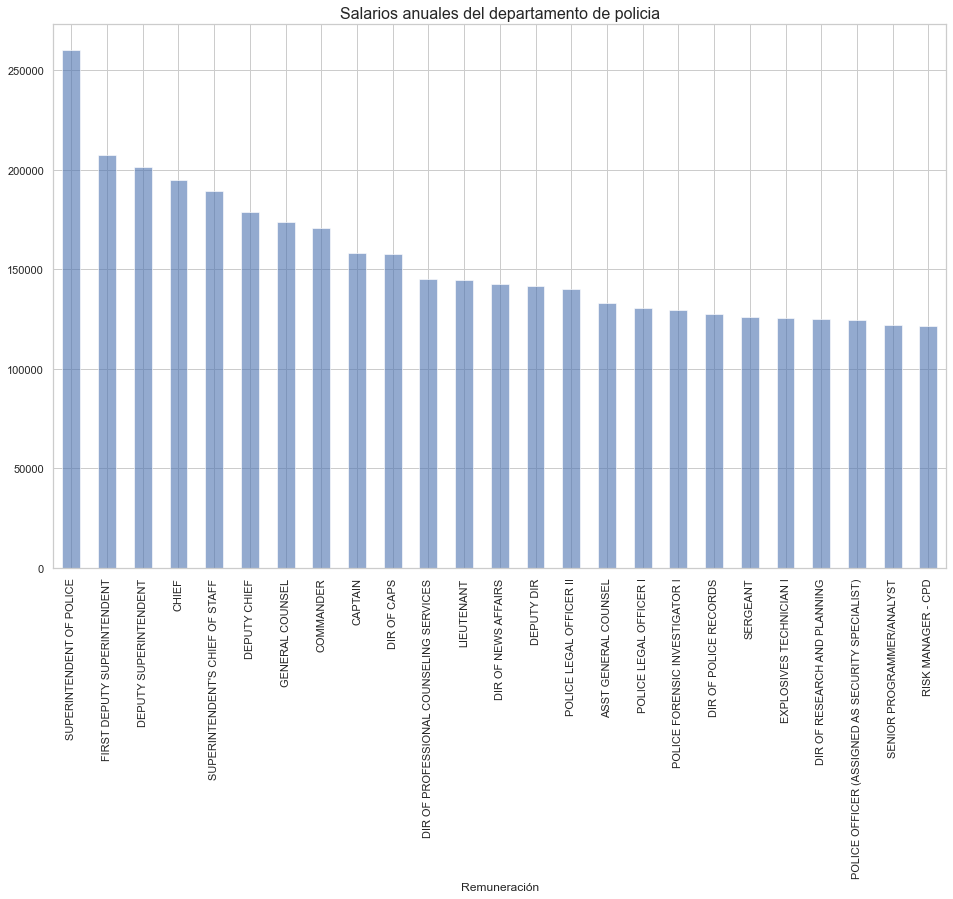

In [35]:
police_media['Annual Salary'].head(25).plot(kind='bar', alpha=0.6, figsize=(16,10))
plt.xlabel("Remuneración")
plt.title("Salarios anuales del departamento de policia",
    fontdict = {'fontsize':16})

#### Cargos en el departamento de policia con menor Remuneración anual

Text(0.5, 1.0, 'Salarios anuales del departamento de policia')

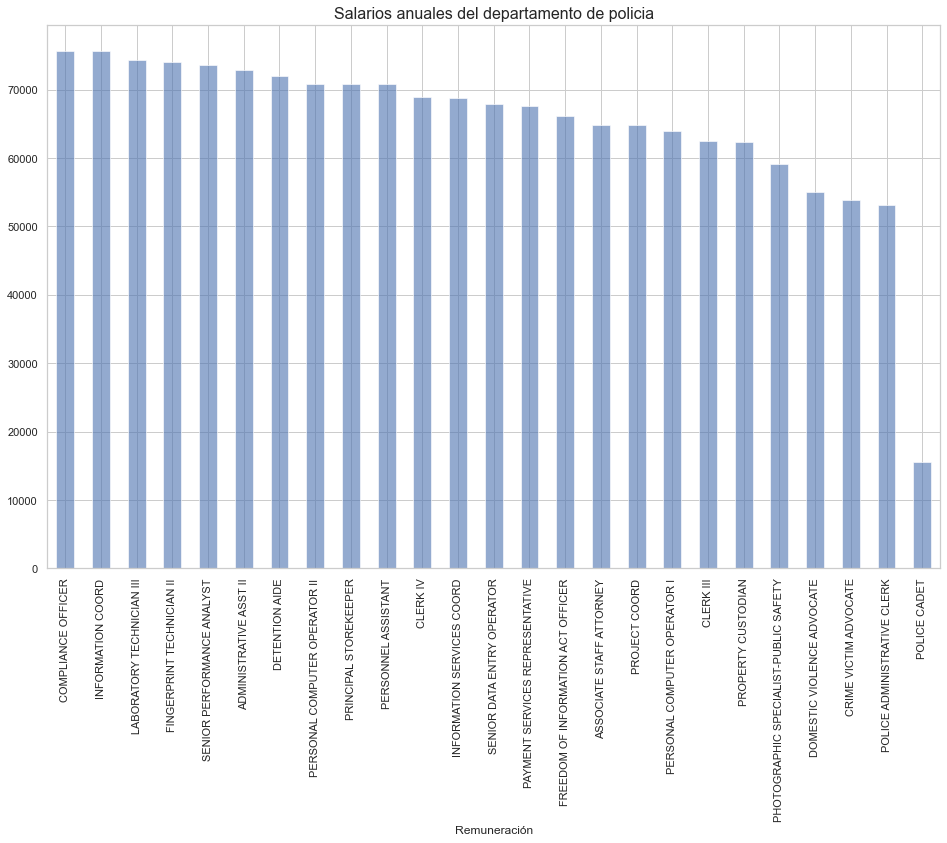

In [36]:
police_media['Annual Salary'].tail(25).plot(kind='bar', alpha=0.6, figsize=(16,10))
plt.xlabel("Remuneración")
plt.title("Salarios anuales del departamento de policia",
    fontdict = {'fontsize':16})

#### Media de salarios de trabajadores del Dpto de policia, desviación estandar, quartiles, mínimos y máximos

Existen 98 cargos diferentes dentro del departamento, el salario medio anual del mismo es de USD 101387,80 y la desviación estándar es de USD 17372,06 con respecto de la media.

In [37]:
police_dataset = Jobs_dataset[police_mask]

In [38]:
Jobs_dataset[police_mask].describe()

,Annual Salary,Salary
count,12537.000000,12537.000000
mean,101387.804097,8448.983675
std,17372.069950,1447.672496
min,15600.000000,1300.000000
25%,95586.000000,7965.500000
50%,102372.000000,8531.000000
75%,109236.000000,9103.000000
max,260004.000000,21667.000000


#### Distribución de salarios anuales de trabajadores pertenecientes al departamento de policia

Text(0.5, 1.0, 'Distribución de salarios anualizados para trabajadores del departamento de policia')

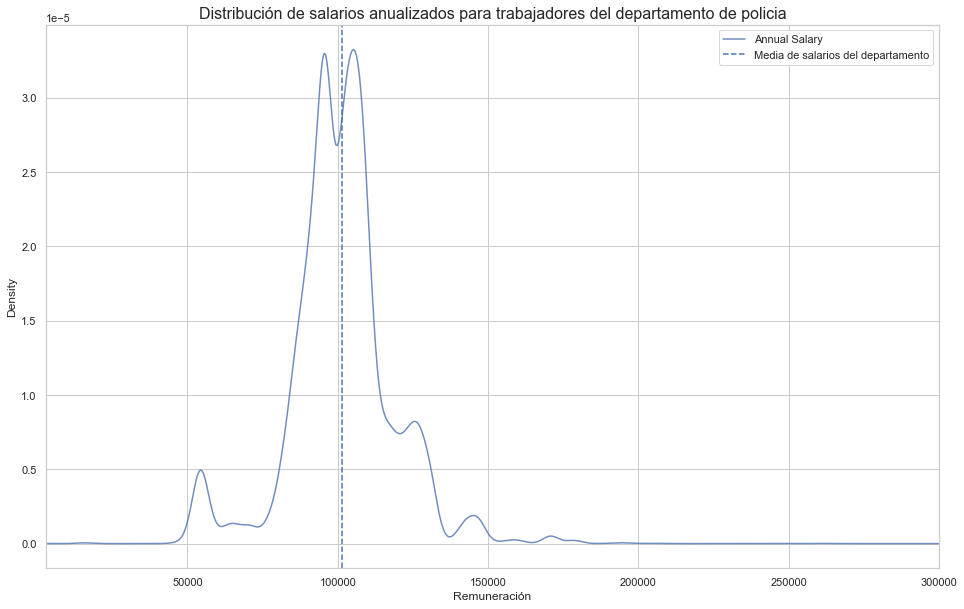

In [39]:
police_dataset['Annual Salary'].plot(kind='kde', alpha=0.8, figsize=(16,10))
plt.axvline(police_dataset["Annual Salary"].mean(),linestyle = 'dashed', label="Media de salarios del departamento")
plt.legend()
plt.xlim([3000, 300000])
plt.xlabel("Remuneración")
plt.title("Distribución de salarios anualizados para trabajadores del departamento de policia",
    fontdict = {'fontsize':16})

### Análisis de las remuneraciones del departamento de bomberos

#### Agrupación por media de salarios según tipo de trabajo

In [40]:
fire_mask = Jobs_dataset["Department"] == "FIRE"
fire_media = Jobs_dataset[fire_mask]
fire_media = fire_media[["Department", "Job Titles","Annual Salary"]].groupby("Job Titles").mean()
fire_media.sort_values("Annual Salary",ascending=False, inplace=True)
fire_media

,Annual Salary
Job Titles,
FIRE COMMISSIONER,228612.0
FIRST DEPUTY FIRE COMMISSIONER,207624.0
DEPUTY FIRE COMMISSIONER,197064.0
ASST DEPUTY FIRE COMMISSIONER,194616.0
DISTRICT CHIEF,182640.0
...,...
ASSOCIATE FIRE PREVENTION ENGINEER,67536.0
INVESTIGATOR,65076.0
CLERK IV,55620.0


Cantidad de cargos diferentes dentro del departamento

In [41]:
len(fire_media)

79

Total de trabajadores del departamento de bomberos

In [42]:
len(Jobs_dataset[fire_mask])

4801

#### Cargos en el departamento de Bomberos con mayor Remuneración anual

Text(0.5, 1.0, 'Salarios anuales del departamento de bomberos')

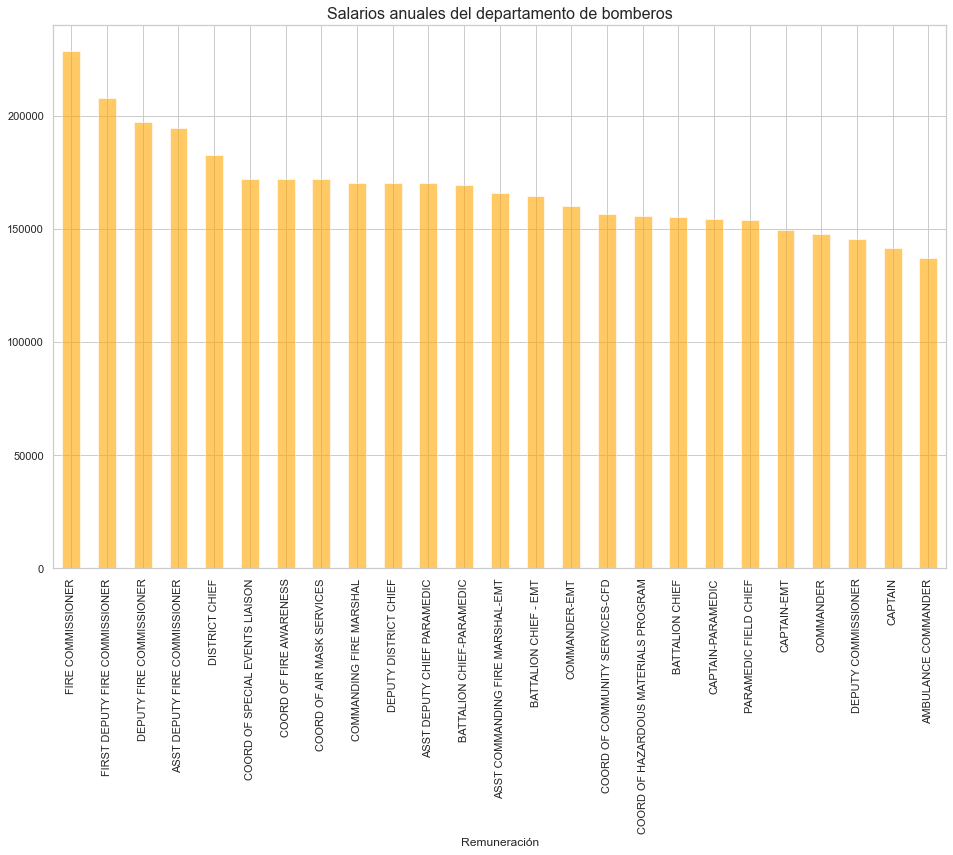

In [43]:
fire_media['Annual Salary'].head(25).plot(kind='bar', alpha=0.6, figsize=(16,10), color="orange")
plt.xlabel("Remuneración")
plt.title("Salarios anuales del departamento de bomberos",
    fontdict = {'fontsize':16})

#### Cargos en el departamento de Bomberos con menor Remuneración anual

Text(0.5, 1.0, 'Salarios anuales del departamento de bomberos')

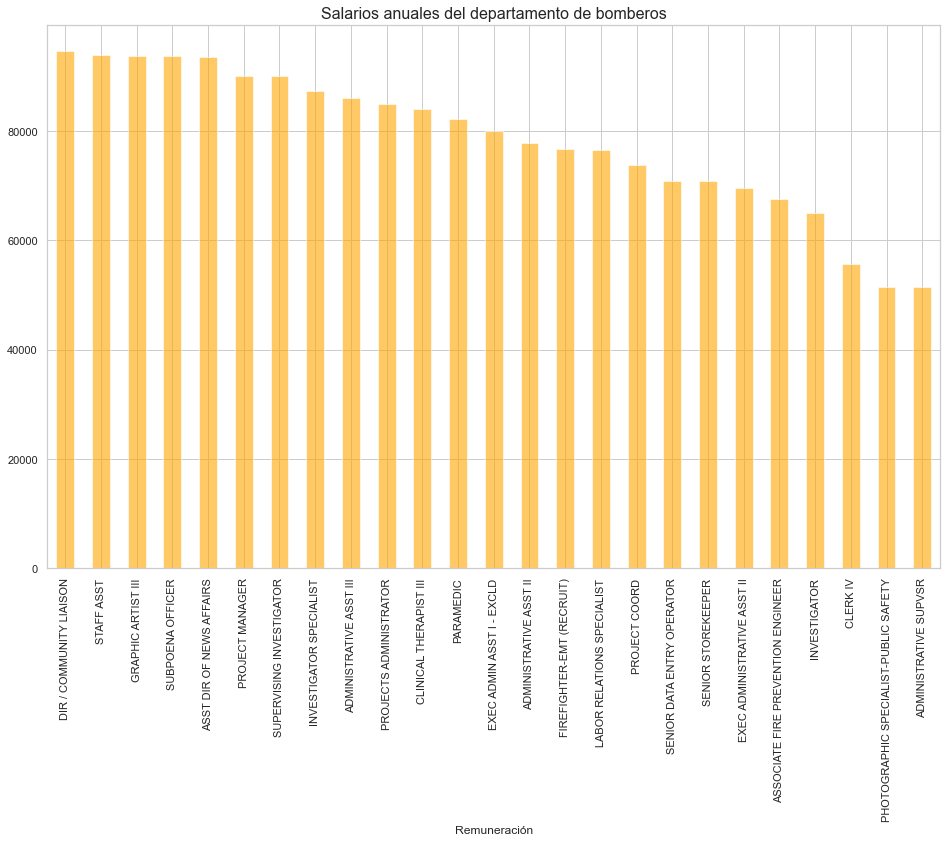

In [44]:
fire_media['Annual Salary'].tail(25).plot(kind='bar', alpha=0.6, figsize=(16,10), color="orange")
plt.xlabel("Remuneración")
plt.title("Salarios anuales del departamento de bomberos",
    fontdict = {'fontsize':16})

#### Media de salarios de trabajadores del Dpto de bomberos, desviación estandar, quartiles, mínimos y máximos

Existen 79 cargos diferentes dentro del departamento, el salario medio anual del mismo es de USD 106029,22 y la desviación estándar es de USD 23317,54 con respecto de la media.

In [45]:
fire_dataset = Jobs_dataset[fire_mask]

In [46]:
fire_dataset.describe()

,Annual Salary,Salary
count,4801.000000,4801.000000
mean,106029.222179,8835.768515
std,23317.542959,1943.128580
min,51408.000000,4284.000000
25%,94152.000000,7846.000000
50%,102372.000000,8531.000000
75%,115308.000000,9609.000000
max,228612.000000,19051.000000


#### Distribución de salarios anuales de trabajadores pertenecientes al departamento de bomberos

Text(0.5, 1.0, 'Distribución de salarios anualizados para trabajadores del departamento de bomberos')

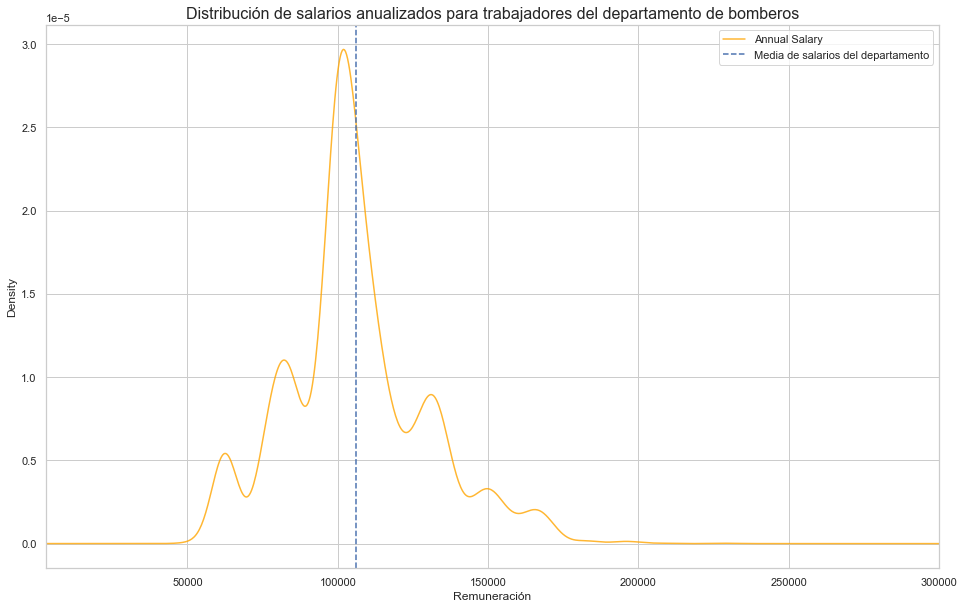

In [47]:
fire_dataset['Annual Salary'].plot(kind='kde', alpha=0.8, figsize=(16,10), color="orange")
plt.axvline(fire_dataset["Annual Salary"].mean(),linestyle = 'dashed', label="Media de salarios del departamento")
plt.legend()
plt.xlim([3000, 300000])
plt.xlabel("Remuneración")
plt.title("Distribución de salarios anualizados para trabajadores del departamento de bomberos",
    fontdict = {'fontsize':16})

### Comparativa de distribuciones de salarios en ambos departamentos y la distribución de remuneraciones general

Text(0.5, 1.0, 'Distribuciónes de salarios anualizados')

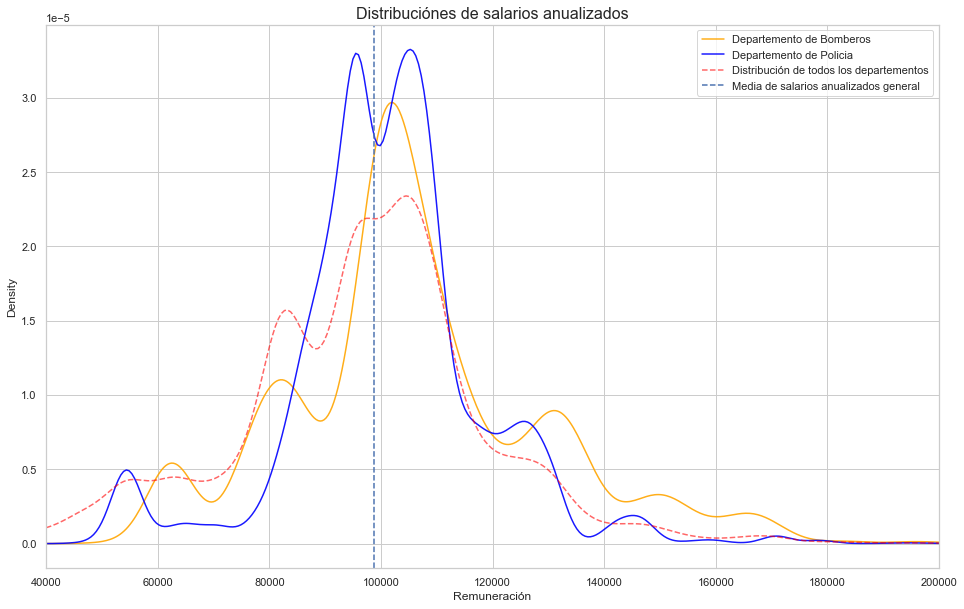

In [48]:
fire_dataset['Annual Salary'].plot(kind='kde', alpha=0.9, figsize=(16,10), c="Orange", label="Departemento de Bomberos")
police_dataset['Annual Salary'].plot(kind='kde', alpha=0.9, figsize=(16,10), c="Blue", label="Departemento de Policia")
Jobs_dataset['Annual Salary'].plot(kind='kde', alpha=0.6, figsize=(16,10), linestyle="dashed", c="Red",label="Distribución de todos los departementos")
plt.axvline(dataset["Annual Salary"].mean(),linestyle = 'dashed', label="Media de salarios anualizados general")
plt.xlim([40000, 200000])
plt.xlabel("Remuneración")
plt.legend()
plt.title("Distribuciónes de salarios anualizados",
    fontdict = {'fontsize':16})

In [49]:
#diferencia % entre la media anual de salarios del departamento de policia y del departamento de bomberos
dif_medias_salario_pol_y_fire = 106029.22 / 101387.80 *100 - 100 
print("% " + str(dif_medias_salario_pol_y_fire))

% 4.5778880693732305


In [50]:
#diferencia % entre la población del departamento de policia y del departamento de bomberos
dif_n_pol_y_fire = 12537 / 4801 * 100
print("% " + str(dif_n_pol_y_fire))

% 261.13309727140177


Con respecto al análisis de los departamentos, se puede decir que la media de salarios del departamento de bomberos es un % 4.57 mayor que la media de salarios del departamento de policia.
La población de trabajadores en el departamento de policia es de 12537 y la del departamento de bomberos de 4801, siendo aproximadamente 2,6 veces mayor.

En relación a la desviación estándar, tomando como medida comparativa los valores de los salarios anuales, podemos decir que la variación en los salarios del departamento de policia (std 17372.069950) es menor a la desviación de los valores de la distribución del departamento de bomberos (std 23317.54), interpretando que la dispersión de los valores de remuneración con respecto a la media del departamento de policia es menor (dicha diferencia en la desviación estándar está influenciada por valores extremos y por la menor cantidad de trabajadores en el departamento de bomberos).